# Porosimetry vs Local Thickness Filters

The following recipe illustrates how to simulate mercury intrusion porosimetry on an image using the ``porosimetry`` filter.  The PoreSpy implementation is equivalent to 'morphological image opening' of [Hilpert et al](https://www.sciencedirect.com/science/article/pii/S0309170800000567?via%3Dihub).  PoreSpy's implementation uses distance transforms instead of morphological operations so it is generally faster, especially for larger sphere sizes since binary opening slows down with larger structuring elements.

In [2]:
# ---------- NOTE ON VERSION ----------
# PoreSpy is a continually evolving package, with new features added regularly, 
# and occasionally backwards incompatible changes.  For this reason it is very  
# time consuming to keep all the examples up to date with the latest version.  
# As such, each example is written for a specific version of PoreSpy, and these 
# notebooks are run on that version using the powerful ability of pip to install 
# a tagged version from Github:

# !pip install -q git+https://github.com/PMEAL/PoreSpy.git@V1.0.1
import porespy as ps
print(ps.__version__)

1.0.1


Start by importing the necessary packages

In [3]:
import matplotlib.pyplot as plt

Generate an artificial 2D image for illustration purposes:

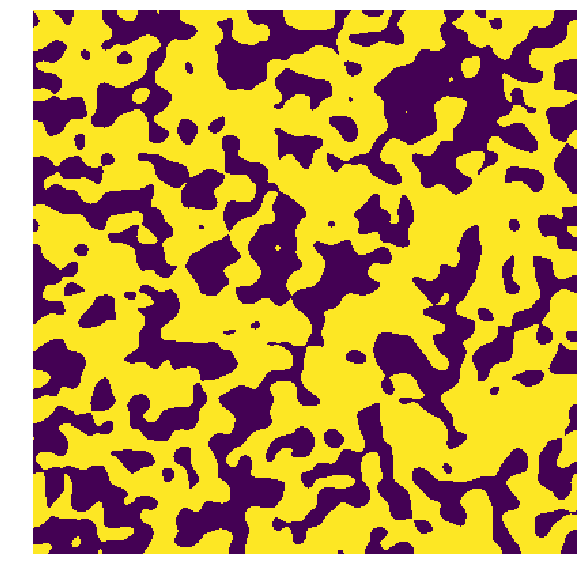

In [4]:
im = ps.generators.blobs(shape=[400, 400], porosity=0.6, blobiness=2)
plt.figure(figsize=[10, 10])
plt.imshow(im)
plt.axis('off')
plt.show()

Apply the ``porosimetry`` filter to the image both with and without ``access_limited`` applied:

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 57.29it/s]


(-0.5, 399.5, 399.5, -0.5)

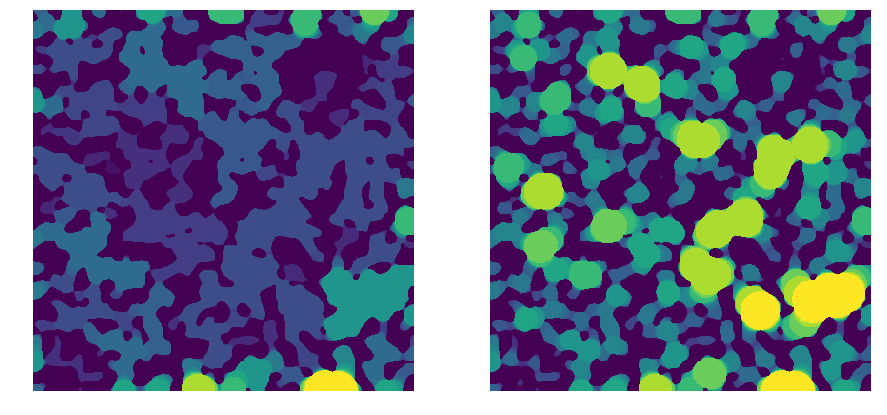

In [10]:
mip = ps.filters.porosimetry(im, access_limited=True)
local_t = ps.filters.porosimetry(im, access_limited=False)
fig, ax = plt.subplots(1, 2, figsize=[15, 10])
ax[0].imshow(mip)
ax[0].axis('off')
ax[1].imshow(local_t)
ax[1].axis('off')

Finally, the images produced by the filter can be passed to the ``pore_size_distribution`` function in the ``metrics`` module to produce numerical data of the pore volume vs. sphere radius:

In [11]:
mip_data = ps.metrics.pore_size_distribution(mip)
local_t_data = ps.metrics.pore_size_distribution(local_t)

Many of the functions in the ``metrics`` folder return a *named tuple* containg several arrays with different values.  The *named tuple* lets us apply a name to each array to differentiate what information is stored there.  You can print the attributes using the hidden ``_fields`` method on the *named tuple* as shown below.  (Note that hidden methods are not meant to be used or at least relied upon as they may change in future versions.)

In [12]:
print(mip_data._fields)

('logR', 'pdf', 'cdf', 'satn', 'bin_centers', 'bin_edges', 'bin_widths')


So we can see we can plot 'logR' vs 'cdf', as follows:

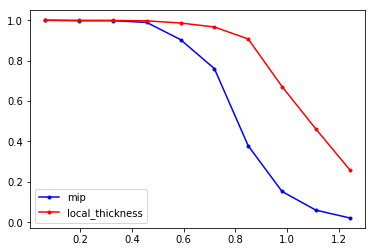

In [13]:
plt.plot(mip_data.logR, mip_data.cdf, 'b.-', label='mip')
plt.plot(local_t_data.logR, local_t_data.cdf, 'r.-', label='local_thickness')
plt.legend()
plt.show()

As expected, the MIP data show smaller sizes, since the invading fluid must overcome constrictions in order to reach the center of the sample, while local thickness does not experience access limitations.